In [ ]:
!pip install google-generativeai
!pip install openai

In [ ]:
import os
os.environ["GEMINI_API_KEY"] = ""
os.environ["DEEPSEEK_API_KEY"] = ""
os.environ["OPENAI_API_KEY"] = ""

In [58]:
llms = ["DEEP_SEEK", "OPEN_AI", "GEMINI"]

## Building common input output function of LLM

### Gemini Chat

In [64]:
import os
import google.generativeai as genai

genai.configure(api_key=os.getenv("GEMINI_API_KEY"))

def google_generate_answer(prompt):
  # Generate text
  model = genai.GenerativeModel("gemini-1.5-flash")
  response = model.generate_content(prompt)
  return response.text


prompt = "Who are you?"
print(google_generate_answer(prompt))

I am a large language model, trained by Google.  I am an AI assistant that can provide information, generate text, and engage in conversations.



### DeepSeek Chat

In [20]:
from openai import OpenAI
deepseek_client = OpenAI(api_key=os.getenv("DEEPSEEK_API_KEY"), base_url="https://api.deepseek.com")

def deepseek_generate_answer(prompt):


  response = deepseek_client.chat.completions.create(
      model="deepseek-chat",
      messages=[
          {"role": "system", "content": "You are a world class html parser."},
          {"role": "user", "content": prompt},
      ],
      stream=False
  )

  return response.choices[0].message.content

deepseek_generate_answer("Who are you?")


'I am an AI language model created by OpenAI, designed to assist with a wide range of tasks, including answering questions, providing explanations, generating text, and more. If you have any specific questions or need help with something, feel free to ask!'

### ChatGPT Chat

In [34]:
from openai import OpenAI

chatgpt_client = OpenAI(
  api_key=os.getenv("OPENAI_API_KEY"),
  organization='org-ROdsRxFwHq5KOHYVhreIGG25',
  project='proj_dyNIbzUJx56xiXHve8VY9P3A',
)

def chatgpt_generate_answer(prompt):
  response = chatgpt_client.chat.completions.create(
      messages=[{
          "role": "user",
          "content": prompt,
      }],
      model="gpt-4o-mini",
  )
  return response.choices[0].message.content

chatgpt_generate_answer("Who are you?")

"I'm an AI language model created by OpenAI, designed to assist with a variety of questions and topics by providing information, answering queries, and engaging in conversation. How can I help you today?"

## Generate LLM Answer and Accuracy:

In [60]:
def generate_answer(llm, question, option_1, option_2, option_3, option_4):
    prompt = f"""
    Question: {question}
    A: f{option_1}
    B: f{option_2}
    C: f{option_3}
    D: f{option_4}

    Please provide answer in <Answer> YOUR ANSWER HERE, ONLY A/B/C/D</Answer>
    """
    # Convert question to string to avoid TypeError
    prompt = prompt.replace("${content}", str(question))

    if llm == "DEEP_SEEK":
        answer = deepseek_generate_answer(prompt)
    elif llm == "OPEN_AI":
        answer = chatgpt_generate_answer(prompt)
    elif llm == "GEMINI":
        answer = google_generate_answer(prompt)
    else:
        answer = None

    try:
        answer = answer.replace("<Answer>", "").replace("</Answer>", "").strip()
    except:
        answer = None

    return answer

In [30]:
answer = "<Answer> A </Answer>"
answer.replace("<Answer>", "").replace("</Answer>", "").strip()

'A'

In [67]:
import pandas as pd
csv_file_path = "questions_answers_10-42_BCS.csv"
df = pd.read_csv(csv_file_path, sep=',')

In [68]:
df

,Question,Subject,Answer,A,B,C,D
0,‘আনারস’ এবং ‘চাবি’ শব্দ দুটি বাংলা ভাষা গ্রহণ ...,BANGLA-LANGUAGE,A,পর্তুগিজ ভাষা হতে,আরবি ভাষা হতে,দেশী ভাষা হতে,ওলন্দাজ ভাষা হতে
1,শুদ্ধ বানান কোনটি?,BANGLA-LANGUAGE,B,মূমুর্ষু,মুমূর্ষু,মূমূর্ষ,মুমূর্ষ
2,গুরুচণ্ডালী দোষমুক্ত কোনটি?,BANGLA-LANGUAGE,C,শবপোড়া,মড়াদাহ,শবদাহ,শবমড়া
3,‘কবর’ নাটকটির লেখক-,BANGLA-LITERATURE,C,জসীমউদ্দীন,নজরুল ইসলাম,মুনীর চৌধুরী,দ্বিজেন্দ্রলাল রায়
4,‘উভয়কূল রক্ষা’ অর্থে ব্যবহৃত প্রবচন কোনটি?,BANGLA-LANGUAGE,C,"কারো পৌষ মাস, কারো সর্বনাস","চাল না চুলো, ঢেঁকী না কুলো","সাপও মরে, লাঠিও না ভাঙ্গে","বোঝার উপর, শাকের আঁটি"
...,...,...,...,...,...,...,...
3945,Liza had given me two:,ENGLISH-LANGUAGE,C,pair of jean,pairs of jean,pair of jeans,pairs of jeans
3946,গণপ্রজাতন্ত্রী বাংলাদেশের সংবিধানের খসড়া সর্বপ...,BANGLADESH-AFFAIRS,B,১১ নভেম্বর,১২ অক্টোবর,১৬ ডিসেম্বর,৩ মার্চ
3947,অধিত্যকা এর বিপরীতার্থক শব্দ কোনটি?,BANGLA-LANGUAGE,A,উপত্যকা,ধিত্যকা,পার্বত্য,সমতল
3948,নিচের প্রশ্নবোধক স্থানে কোনটি বসবে? \({\mathrm...,MENTAL-ABILITY,D,\(54\over \mathrm N\),\(\mathrm T \over 19\),\(\mathrm L \over 52\),\(\mathrm V \over 36\)


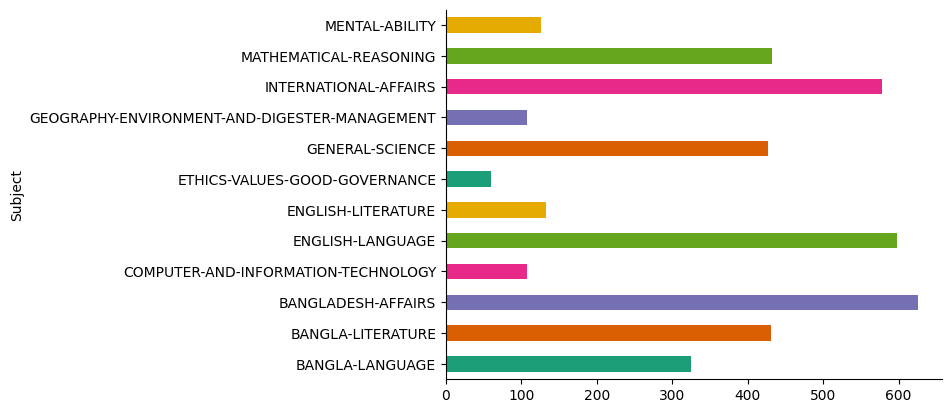

In [66]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Finding accuracy:

In [ ]:
# Initialize columns for each LLM's generated answer (if they don't already exist)
df = df.sample(10)

for llm in llms:
    if llm not in df.columns:
        df[llm] = None  # Add a column for each LLM to store generated answers

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Skip rows that have already been processed (if resuming)
    if all(pd.notna(row[llm]) for llm in llms):
        print(f"Skipping row {index + 1} (already processed)")
        continue

    question = row['Question']
    option_1 = row['A']
    option_2 = row['B']
    option_3 = row['C']
    option_4 = row['D']
    correct_answer = row['Answer']  # Assuming you have a column 'Correct_Answer'

    # Generate answers for each LLM
    for llm in llms:
        generated_answer = generate_answer(llm, question, option_1, option_2, option_3, option_4)
        df.at[index, llm] = generated_answer  # Store the generated answer in the DataFrame

    # Save the updated DataFrame back to the CSV file after processing each row
    df.to_csv(csv_file_path, index=False)
    print(f"Processed row {index + 1}/{len(df)}")


In [74]:
df.head()

,Question,Subject,Answer,A,B,C,D,DEEP_SEEK,OPEN_AI,GEMINI
1539,She has –––– her hair a beautiful shade of brown.,ENGLISH-LANGUAGE,D,colored,given,dried,dyed,D,D,D
2734,NaN,MENTAL-ABILITY,C,৬টি,৭টি,৮টি,১০টি,A,A,A
1200,‘পথের দাবি’ উপন্যাসের রচয়িতা কে?,BANGLA-LITERATURE,A,শরৎচন্দ্র চট্টোপাধ্যায়,মানিক বন্দ্যোপাধ্যায়,সত্যেন সেন,সুকান্ত ভট্টাচার্য,C,A,B
3626,সঠিক বানান কোনটি?,MENTAL-ABILITY,A,Indwelling,Indwling,Indweling,Indeulling,A,A,C
2981,কবি কায়কোবাদ রচিত ‘মহাশ্মশান’ কাব্যের ঐতিহাসিক...,BANGLA-LITERATURE,B,পলাশীর যুদ্ধ,তৃতীয় পানিপথের যুদ্ধ,১৮৫৭ সালের সিপাহী বিদ্রোহ,ছিয়াত্তরের মন্বন্তর,B,C,A


In [73]:

# Calculate accuracy for each LLM
correct_answers = {llm: 0 for llm in llms}
for index, row in df.iterrows():
    correct_answer = row['Answer']
    for llm in llms:
        if row[llm] == correct_answer:
            correct_answers[llm] += 1

# Calculate and print accuracy
total_questions = len(df)
accuracy = {llm: (correct_answers[llm] / total_questions) * 100 for llm in llms}
for llm in llms:
    print(f"Accuracy for {llm}: {accuracy[llm]:.2f}%")

Accuracy for DEEP_SEEK: 70.00%
Accuracy for OPEN_AI: 60.00%
Accuracy for GEMINI: 30.00%
